In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time
import pandas

import matplotlib.pyplot as plt
import numpy as np

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.utils import *
from LazyLuna.Figures import *
from LazyLuna.Views import *

In [11]:
# basepaths
bp        = '/Users/dietrichhadler/Desktop/Daten/LL_Repair'
bp_annos1 = '/Users/dietrichhadler/Desktop/Daten/LL_Repair/NI'
bp_annos2 = '/Users/dietrichhadler/Desktop/Daten/LL_Repair/AI'
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/LL_Repair/Cases'
bp_imgs   = '/Users/dietrichhadler/Desktop/Daten/LL_Repair/Imgs'

In [12]:
# get the paths of imgs and annotations via SeriesInstanceUIDs
bp_annos = bp_annos2
imgsanno_paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos)

print('Nr of path tuples: ', len(imgsanno_paths))
case_names = sorted([c[0] for c in imgsanno_paths])
from pprint import pprint
print('Existing Annotations: ', len(sorted([c[0] for c in imgsanno_paths if os.path.exists(c[1])])))
pprint(sorted([c[0] for c in imgsanno_paths if os.path.exists(c[1])]))

cases = []
sax_cine_view = SAX_CINE_View()
sax_cs_view   = SAX_CS_View()
for count, (imgp,annop) in enumerate(imgsanno_paths):
    print(count)
    print(os.path.basename(imgp), os.path.basename(annop))
    #if count!=3: continue
    st = time()
    case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos))
    case = sax_cine_view.initialize_case(case)
    case.store(bp_cases)
    cases.append(case)
    print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
    print()

Nr of path tuples:  4
Existing Annotations:  4
['/Users/dietrichhadler/Desktop/Daten/LL_Repair/Imgs/NICK-20220519_120511',
 '/Users/dietrichhadler/Desktop/Daten/LL_Repair/Imgs/NICK-20220519_124011',
 '/Users/dietrichhadler/Desktop/Daten/LL_Repair/Imgs/NICK-20220519_124704',
 '/Users/dietrichhadler/Desktop/Daten/LL_Repair/Imgs/NICK-20220519_131745']
0
NICK-20220519_131745 1.2.276.0.37.1.87.200512.1047992
Case customization took:  2.7328102588653564 Case:  AI NICK-20220519_131745

1
NICK-20220519_124704 1.2.124.113532.80.22158.18529.20200417.83615.15880623
Case customization took:  2.060918092727661 Case:  AI NICK-20220519_124704

2
NICK-20220519_124011 1.2.276.0.37.1.87.200512.1028023
Case customization took:  2.8510210514068604 Case:  AI NICK-20220519_124011

3
NICK-20220519_120511 1.2.276.0.37.1.87.200512.1070416
Case customization took:  3.1236648559570312 Case:  AI NICK-20220519_120511



4
CASE:  0
starting customize:  NICK-20220519_131745
ending customize:  NICK-20220519_131745
SAX LVES 13 25 10
[]
[]
['lv_myo', 'lv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_epi']
[]
[]
[]
SAX LVED 13 25 24
[]
['lv_myo', 'lv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_epi']
[]
[]
[]
SAX RVES 13 25 11
[]
[]
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
[]
[]
[]
SAX RVED 13 25 23
[]
['rv_endo']
['rv_e

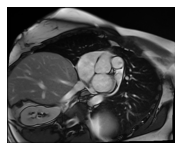

11 36 134131.050000


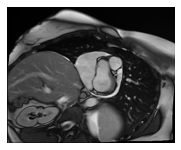

11 61 134200.102500


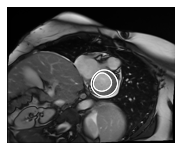

11 86 134229.657500


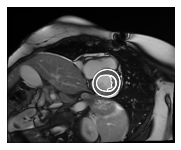

11 111 134258.925000


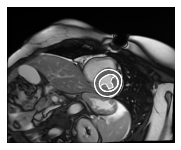

11 136 134328.317500


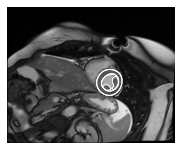

11 161 134358.320000


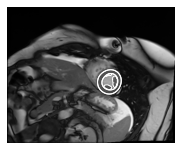

11 186 134428.170000


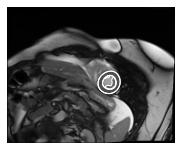

11 211 134457.695000


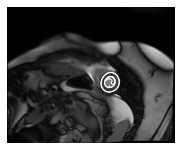

11 236 134527.732500


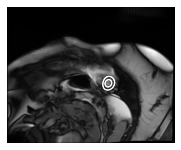

11 261 134557.110000


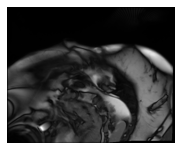

11 286 134626.382500


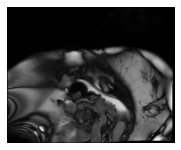

11 311 134655.825000


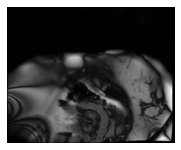



SAX LVED 13 24
25 25 134102.202500


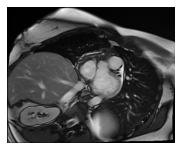

25 50 134131.050000


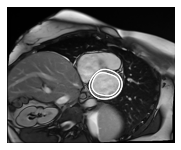

25 75 134200.102500


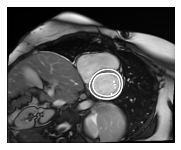

25 100 134229.657500


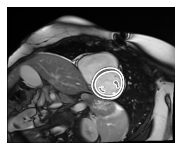

25 125 134258.925000


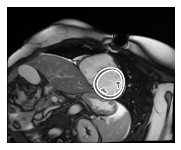

25 150 134328.317500


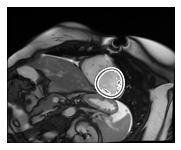

25 175 134358.320000


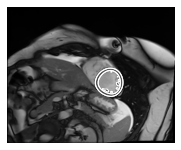

25 200 134428.170000


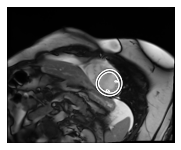

25 225 134457.695000


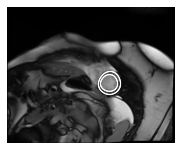

25 250 134527.732500


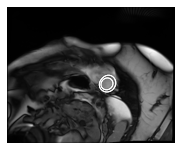

25 275 134557.110000


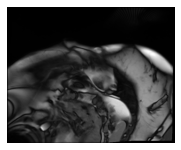

25 300 134626.382500


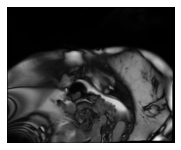

25 325 134655.825000


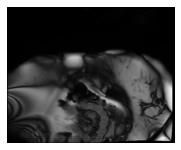



SAX RVES 13 11
12 12 134102.202500


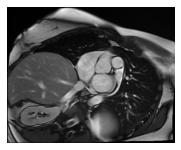

12 37 134131.050000


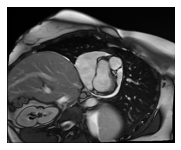

12 62 134200.102500


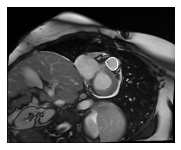

12 87 134229.657500


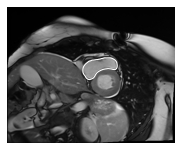

12 112 134258.925000


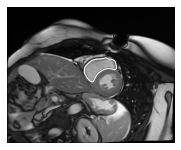

12 137 134328.317500


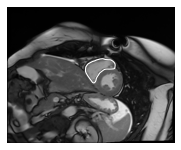

12 162 134358.320000


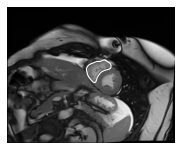

12 187 134428.170000


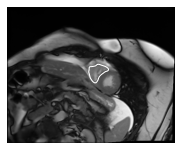

12 212 134457.695000


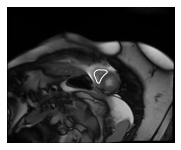

12 237 134527.732500


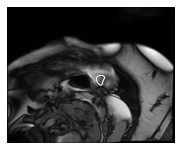

12 262 134557.110000


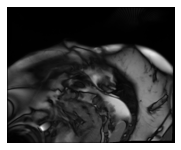

12 287 134626.382500


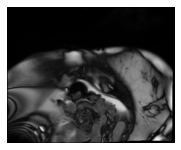

12 312 134655.825000


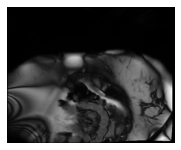



SAX RVED 13 23
24 24 134102.202500


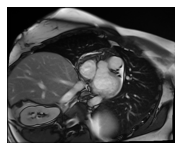

24 49 134131.050000


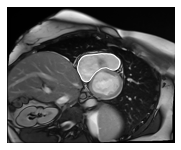

24 74 134200.102500


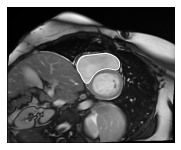

24 99 134229.657500


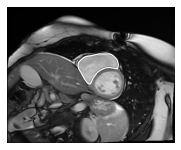

24 124 134258.925000


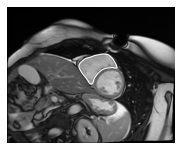

24 149 134328.317500


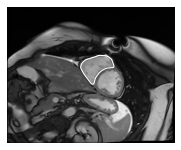

24 174 134358.320000


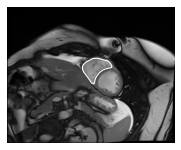

24 199 134428.170000


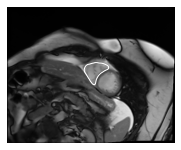

24 224 134457.695000


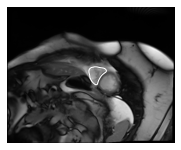

24 249 134527.732500


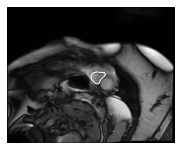

24 274 134557.110000


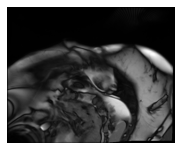

24 299 134626.382500


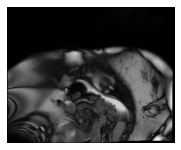

24 324 134655.825000


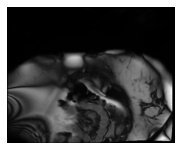


CASE:  1
starting customize:  NICK-20220519_124704
ending customize:  NICK-20220519_124704
SAX LVES 12 25 8
[]
[]
[]
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
[]
[]
SAX LVED 12 25 24
[]
[]
['lv_myo', 'lv_endo', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
[]
[]
SAX RVES 12 25 9
[]
[]
[]
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
['rv_endo']
[]
[]
SAX RVED

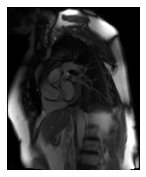

1 9 110851.672500


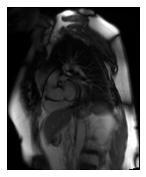

1 9 110926.910000


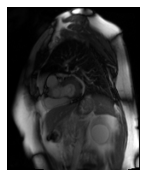

1 9 110932.872500


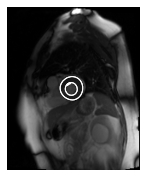

1 9 111006.965000


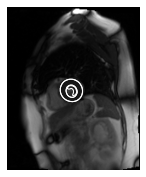

1 9 111012.995000


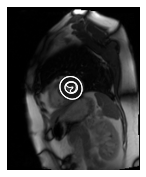

1 9 111054.850000


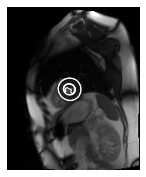

1 9 111100.907500


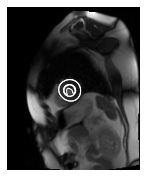

1 9 111138.717500


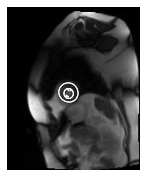

1 9 111144.760000


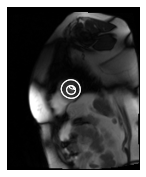

1 9 111240.615000


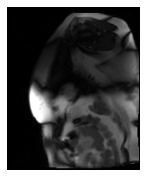

1 9 111246.692500


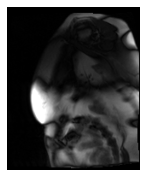



SAX LVED 12 24
1 25 110845.675000


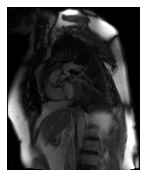

1 25 110851.672500


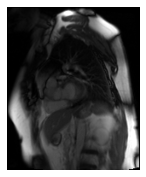

1 25 110926.910000


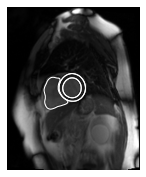

1 25 110932.872500


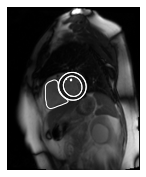

1 25 111006.965000


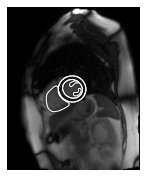

1 25 111012.995000


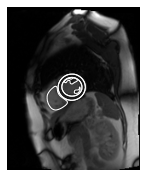

1 25 111054.850000


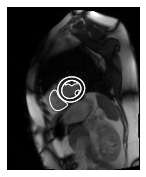

1 25 111100.907500


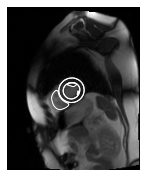

1 25 111138.717500


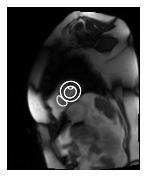

1 25 111144.760000


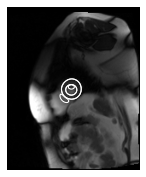

1 25 111240.615000


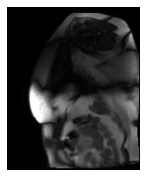

1 25 111246.692500


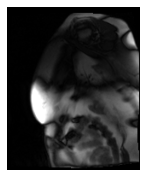



SAX RVES 12 9
1 10 110845.675000


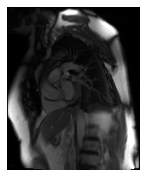

1 10 110851.672500


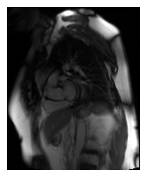

1 10 110926.910000


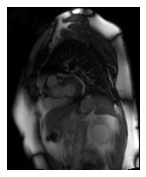

1 10 110932.872500


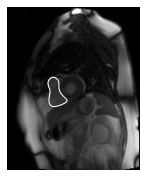

1 10 111006.965000


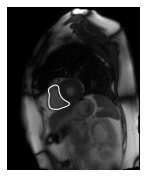

1 10 111012.995000


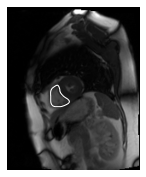

1 10 111054.850000


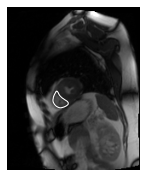

1 10 111100.907500


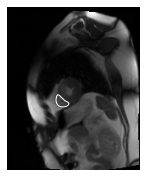

1 10 111138.717500


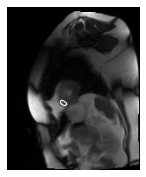

1 10 111144.760000


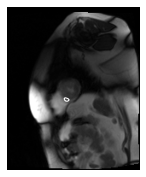

1 10 111240.615000


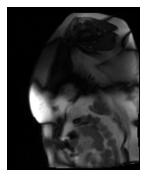

1 10 111246.692500


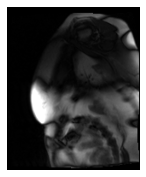



SAX RVED 12 24
1 25 110845.675000


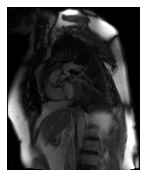

1 25 110851.672500


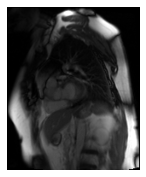

1 25 110926.910000


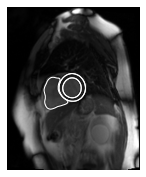

1 25 110932.872500


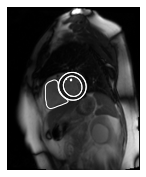

1 25 111006.965000


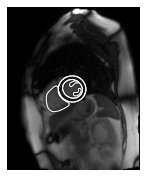

1 25 111012.995000


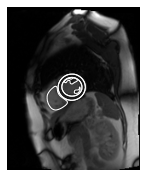

1 25 111054.850000


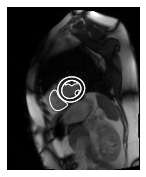

1 25 111100.907500


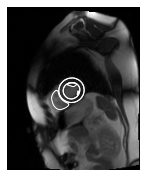

1 25 111138.717500


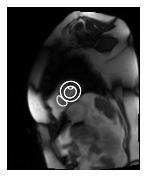

1 25 111144.760000


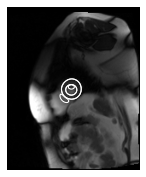

1 25 111240.615000


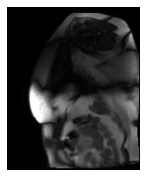

1 25 111246.692500


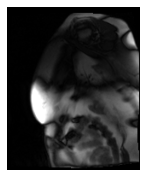


CASE:  2
starting customize:  NICK-20220519_124011
ending customize:  NICK-20220519_124011
SAX LVES 14 25 8
[]
[]
['lv_myo', 'lv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
SAX LVED 14 25 0
[]
['lv_myo', 'lv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_e

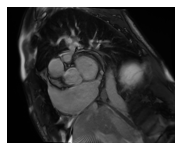

9 309 133236.400000


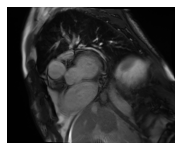

9 284 133205.240000


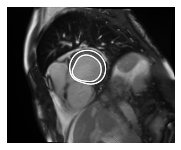

9 259 133134.207500


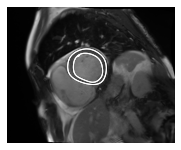

9 234 133102.405000


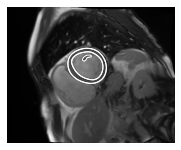

9 209 133030.917500


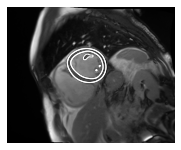

9 184 132959.237500


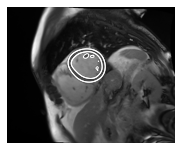

9 159 132928.197500


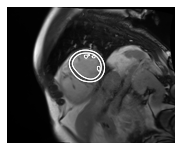

9 134 132857.400000


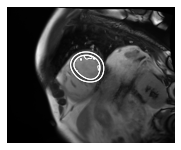

9 109 132826.020000


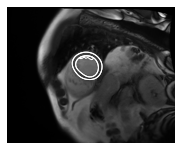

9 84 132754.782500


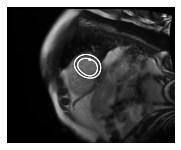

9 59 132723.670000


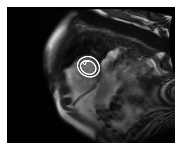

9 34 132652.452500


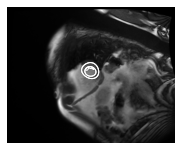

9 9 132621.527500


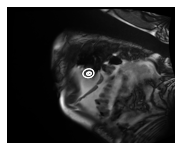



SAX LVED 14 0
1 326 133307.707500


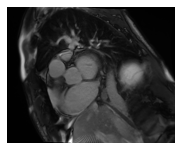

1 301 133236.400000


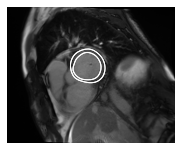

1 276 133205.240000


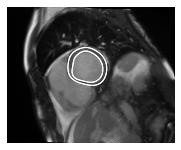

1 251 133134.207500


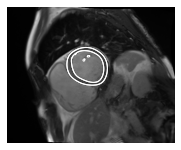

1 226 133102.405000


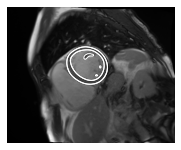

1 201 133030.917500


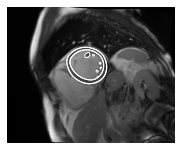

1 176 132959.237500


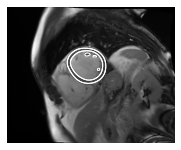

1 151 132928.197500


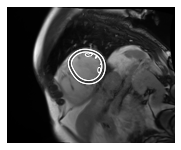

1 126 132857.400000


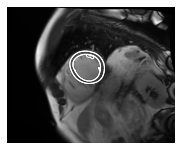

1 101 132826.020000


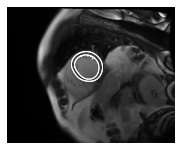

1 76 132754.782500


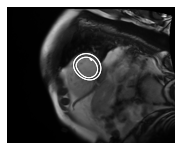

1 51 132723.670000


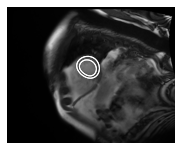

1 26 132652.452500


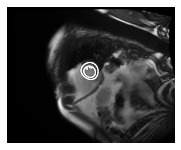

1 1 132621.527500


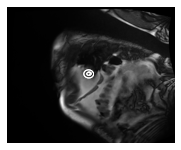



SAX RVES 14 12
13 338 133307.707500


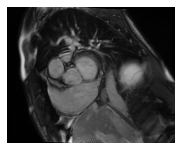

13 313 133236.400000


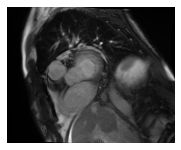

13 288 133205.240000


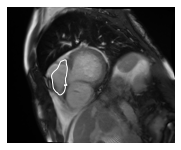

13 263 133134.207500


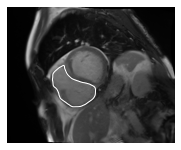

13 238 133102.405000


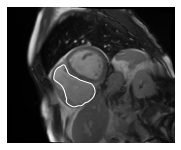

13 213 133030.917500


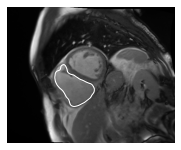

13 188 132959.237500


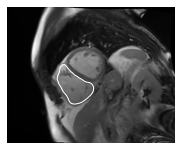

13 163 132928.197500


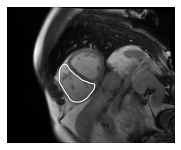

13 138 132857.400000


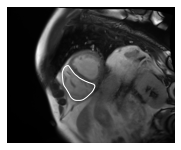

13 113 132826.020000


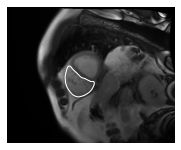

13 88 132754.782500


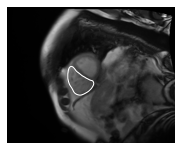

13 63 132723.670000


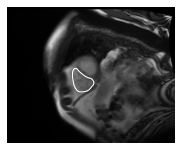

13 38 132652.452500


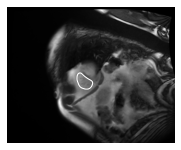

13 13 132621.527500


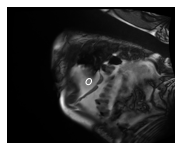



SAX RVED 14 20
21 346 133307.707500


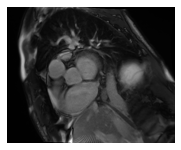

21 321 133236.400000


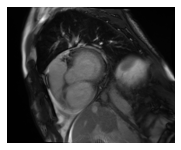

21 296 133205.240000


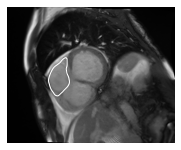

21 271 133134.207500


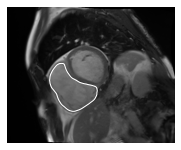

21 246 133102.405000


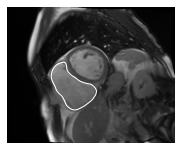

21 221 133030.917500


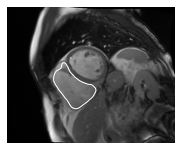

21 196 132959.237500


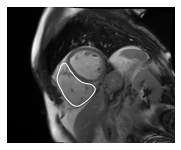

21 171 132928.197500


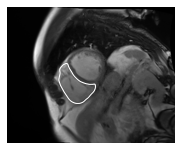

21 146 132857.400000


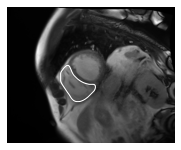

21 121 132826.020000


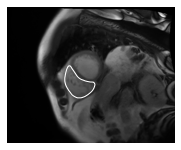

21 96 132754.782500


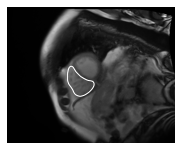

21 71 132723.670000


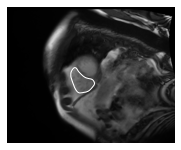

21 46 132652.452500


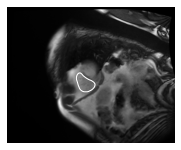

21 21 132621.527500


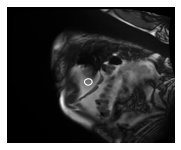


CASE:  3
starting customize:  NICK-20220519_120511
ending customize:  NICK-20220519_120511
SAX LVES 15 25 10
[]
[]
[]
['lv_myo', 'lv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'lv_epi']
[]
SAX LVED 15 25 24
[]
[]
['lv_myo', 'lv_endo', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv_endo', 'lv_epi']
['lv_myo', 'lv_endo', 'lv_pamu', 'rv

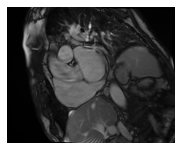

11 336 142411.470000


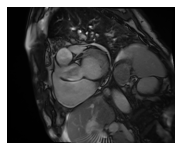

11 311 142341.572500


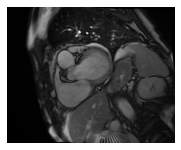

11 286 142311.490000


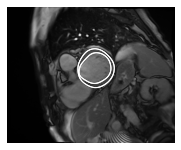

11 261 142242.310000


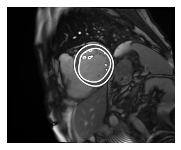

11 236 142212.172500


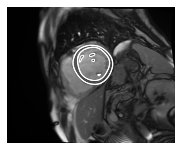

11 211 142142.525000


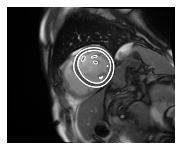

11 186 142112.580000


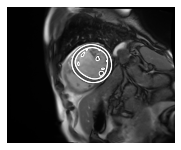

11 161 142043.432500


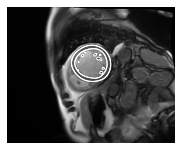

11 136 142012.892500


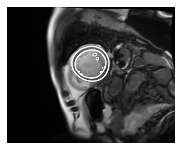

11 111 141942.205000


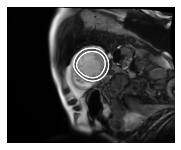

11 86 141912.635000


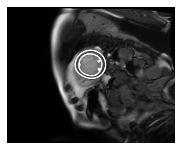

11 61 141843.887500


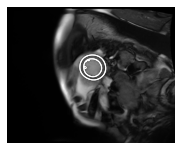

11 36 141814.465000


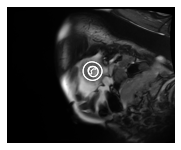

11 11 141742.837500


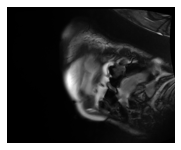



SAX LVED 15 24
25 375 142440.452500


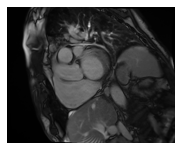

25 350 142411.470000


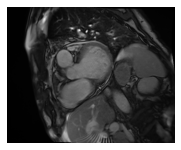

25 325 142341.572500


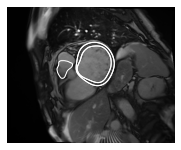

25 300 142311.490000


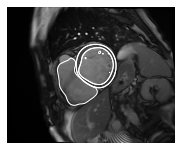

25 275 142242.310000


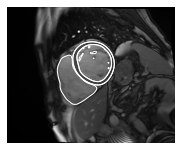

25 250 142212.172500


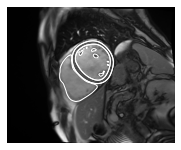

25 225 142142.525000


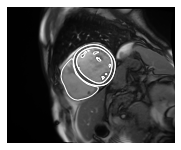

25 200 142112.580000


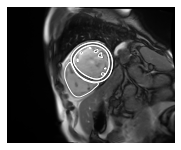

25 175 142043.432500


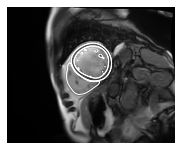

25 150 142012.892500


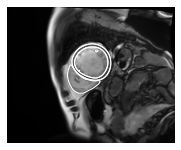

25 125 141942.205000


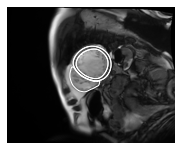

25 100 141912.635000


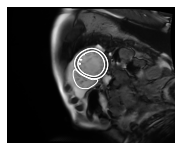

25 75 141843.887500


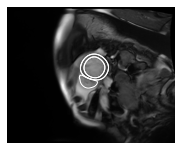

25 50 141814.465000


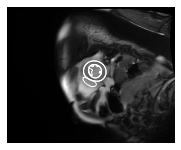

25 25 141742.837500


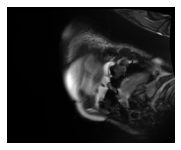



SAX RVES 15 9
10 360 142440.452500


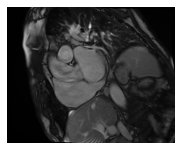

10 335 142411.470000


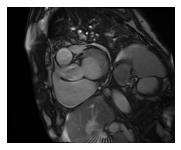

10 310 142341.572500


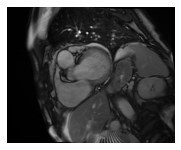

10 285 142311.490000


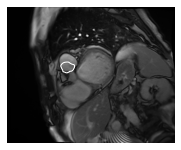

10 260 142242.310000


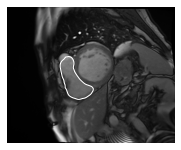

10 235 142212.172500


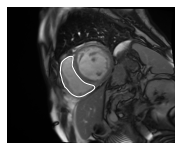

10 210 142142.525000


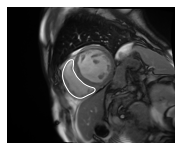

10 185 142112.580000


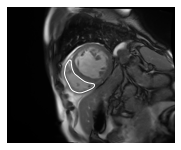

10 160 142043.432500


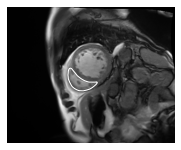

10 135 142012.892500


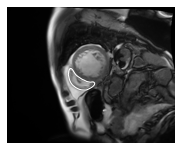

10 110 141942.205000


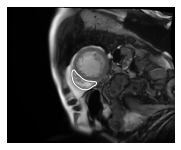

10 85 141912.635000


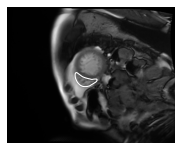

10 60 141843.887500


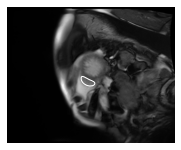

10 35 141814.465000


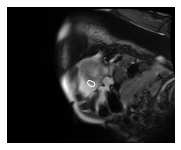

10 10 141742.837500


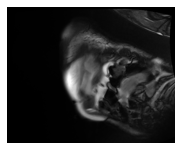



SAX RVED 15 24
25 375 142440.452500


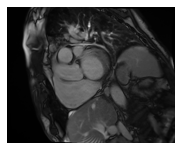

25 350 142411.470000


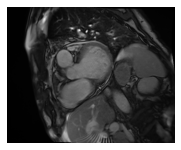

25 325 142341.572500


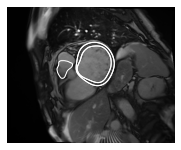

25 300 142311.490000


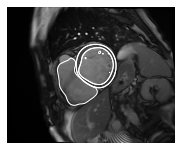

25 275 142242.310000


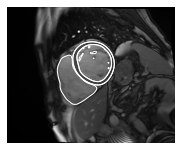

25 250 142212.172500


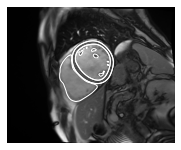

25 225 142142.525000


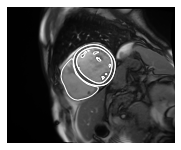

25 200 142112.580000


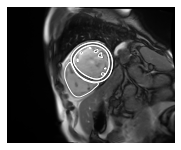

25 175 142043.432500


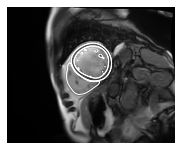

25 150 142012.892500


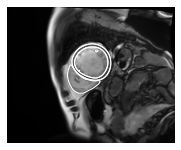

25 125 141942.205000


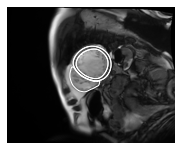

25 100 141912.635000


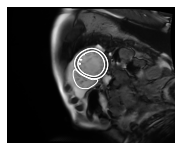

25 75 141843.887500


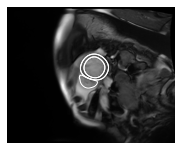

25 50 141814.465000


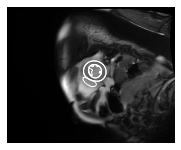

25 25 141742.837500


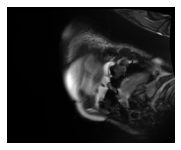

In [13]:
print(len(cases))
for i in range(4):
    print('CASE: ', i)
    case = cases[i]
    case = sax_cine_view.customize_case(case)

    for cat in case.categories:
        print(cat.name, cat.nr_slices, cat.nr_phases, cat.phase)
        for d in range(cat.nr_slices):
            anno = cat.get_anno(d,cat.phase)
            print(anno.available_contour_names())

    for cr in case.crs:
        print(cr.name, cr.get_val())

    for cat in case.categories:
        print()
        print(cat.name, cat.nr_slices, cat.phase)
        for d in range(cat.nr_slices):
            dcm = cat.get_dcm(d,cat.phase)
            print(dcm.AcquisitionNumber, dcm.InstanceNumber, dcm.AcquisitionTime)
            img, anno = cat.get_img(d,cat.phase), cat.get_anno(d,cat.phase)
            fig, ax = plt.subplots(1,1,figsize=(3,3))
            ax.imshow(img, cmap='gray')
            ax.axis('off')
            anno.plot_all_contour_outlines(ax)
            plt.show()
        print()


Found a total of 1629 UIDs in NICK-20220325_112019202203211625571.2.276.0.38.1.1.1.13882.20220321150555.30143413
   !WARNING: Contour is not valid lv_pamu 1.3.12.2.1107.5.2.41.69541.2022032116494159640172494 FREE


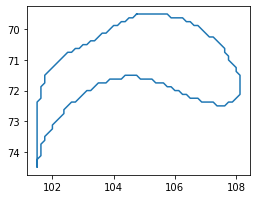

   !WARNING: Contour is not valid lv_pamu 1.3.12.2.1107.5.2.41.69541.202203211649236821372354 FREE


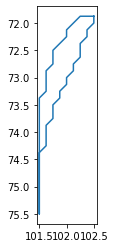

TopologyException: unable to assign free hole to a shell at 102.5 72


ValueError: No Shapely geometry can be created from null value

In [2]:
from catch_converter.parse_contours import parse_cvi42ws


# basepaths
bp = '/Users/dietrichhadler/Desktop/Daten/LL_Repair/FailedWorkspaces/AI_Removed'

parse_cvi42ws(bp, bp, process=True, debug=False)